# [Seaborn catplot](https://seaborn.pydata.org/generated/seaborn.catplot.html)

Figure-level interface for drawing categorical plots onto a FacetGrid.

This function provides access to several axes-level functions that show the relationship between a numerical and one or more categorical variables using one of several visual representations. The `kind` parameter selects the underlying axes-level function to use.

It is informative when we have multiple groups to compare. Using different statistical measures.

It is a way of displaying multiple plot types.


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(rc={'figure.figsize':(11,9)})

In [2]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [3]:
df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


### Comparing the survival probability chances 


In [4]:
df[['pclass','survived']].groupby('pclass').apply(lambda gd: round(gd.survived.value_counts(normalize = True)*100,2))

pclass   
1       1    62.96
        0    37.04
2       0    52.72
        1    47.28
3       0    75.76
        1    24.24
Name: survived, dtype: float64

So survival chances of passenegers of pclass 1 were more as compared to other classes.

We can directly plot the above findings using factorplot.

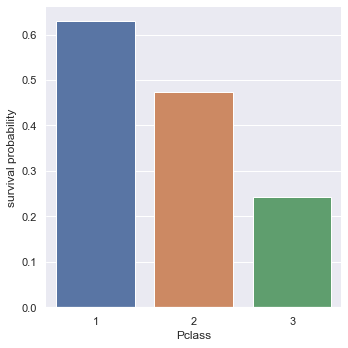

In [5]:
g = sns.catplot(data = df, x = 'pclass', y = 'survived', kind = 'bar', ci = None)
g.despine(left = True)
g.set_axis_labels("Pclass", "survival probability");

## Pointplot using factorplot

#### 1. To find the mean of continuous variable comparing two categorical variable



In [6]:
df.groupby(['survived', 'pclass']).apply(lambda gd: gd['fare'].mean())

survived  pclass
0         1         64.684008
          2         19.412328
          3         13.669364
1         1         95.608029
          2         22.055700
          3         13.694887
dtype: float64

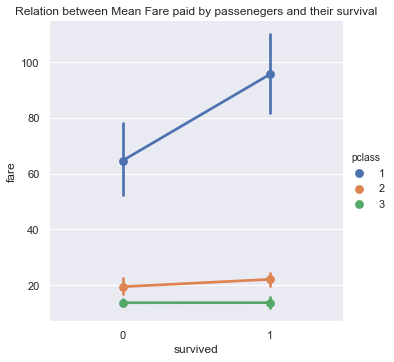

In [7]:
g = sns.catplot(data = df, y = 'fare', x = 'survived', kind = 'point', hue = 'pclass')
plt.title('Relation between Mean Fare paid by passenegers and their survival');

#### 2. Pointplot showing the mean bill paid in the categorical bin formed by day and sex variables.

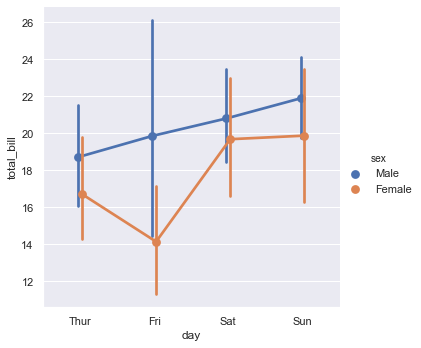

In [8]:
g = sns.catplot(x="day", y="total_bill", hue="sex", data=tips, dodge=True, kind = 'point')

## Boxplot using catplot

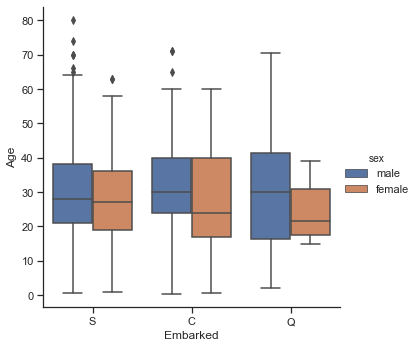

In [9]:
with sns.axes_style(style='ticks'):
    g = sns.catplot(data = df, x = 'embarked', y = 'age', hue = 'sex', kind="box")
    g.set_axis_labels("Embarked", "Age");

### Violin plot using catplot

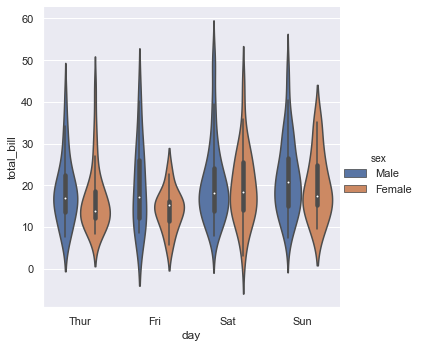

In [10]:
g = sns.catplot(x="day", y="total_bill", hue="sex", data=tips, kind="violin")

### Visualize distribution of a numerical bins using bins formed by 3 object/categorival variable.

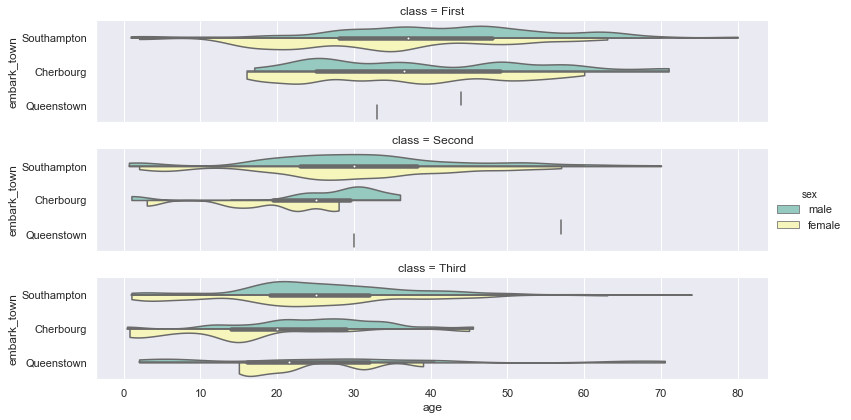

In [11]:
g = sns.catplot(x="age", y="embark_town", hue="sex", row="class", data=df[df.embark_town.notnull()], orient="h", height=2, 
                aspect=5.5, palette="Set3", kind="violin", split=True, cut=0, bw=.2)

### Visualize distribution of a numerical bins using bins formed by 3 object/categorival variable.

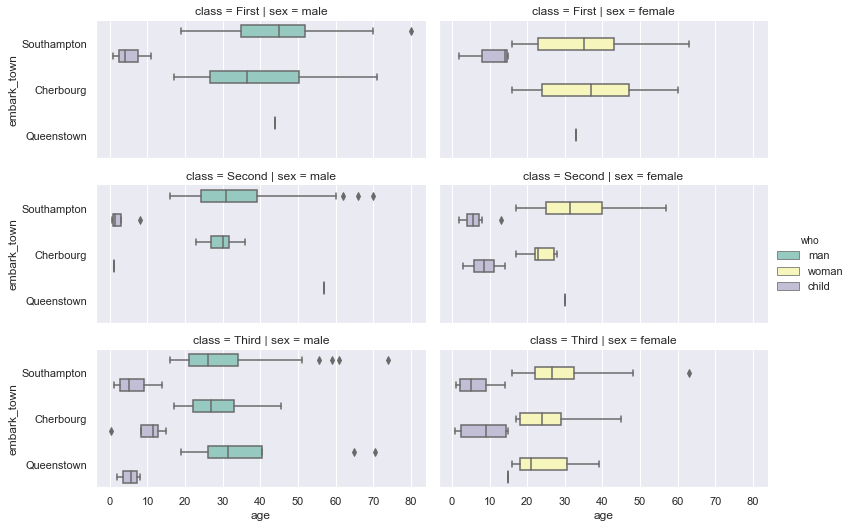

In [12]:
g = sns.catplot(x="age", y="embark_town", hue="who", row="class", col="sex", data=df[df.embark_town.notnull()],
                orient="h", height=2.5, aspect=2.2, palette="Set3", kind="box")

#### Reference:
1. [Python Seaborn Tutorial For Beginners](https://www.datacamp.com/community/tutorials/seaborn-python-tutorial)
2. [Jakevp catplot](https://jakevdp.github.io/PythonDataScienceHandbook/04.14-visualization-with-seaborn.html#Factor-plots)

# Jointplot

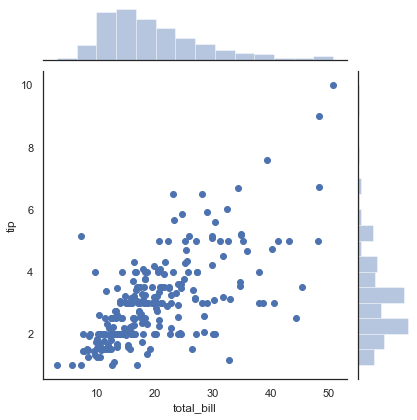

In [13]:
with sns.axes_style('white'):
    sns.jointplot("total_bill", "tip", data=tips, kind='scatter')